# India Agriculture Production Analysis - PySpark Analysis

## Large Dataset: 78,000+ Records (2010-2025)

**Dataset Coverage:**
- 28 Indian States
- 280 Districts  
- 25 Different Crops
- 16 Years (2010-2025)
- 78,442 Total Records

**This notebook demonstrates pure PySpark data analysis and visualization.**

## 1. Initialize PySpark Session

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.window import Window

import warnings
warnings.filterwarnings('ignore')

# Create Spark Session
spark = SparkSession.builder \
    .appName("India Agriculture Analysis") \
    .config("spark.driver.memory", "4g") \
    .config("spark.sql.shuffle.partitions", "8") \
    .getOrCreate()

print(f"Spark Version: {spark.version}")
print(f"Application Name: {spark.sparkContext.appName}")
print(f"Master: {spark.sparkContext.master}")

Spark Version: 3.5.6
Application Name: India Agriculture Analysis
Master: local[*]


## 2. Load Large Dataset

In [2]:
# Load the large agriculture dataset
df = spark.read.csv('india_agriculture_large.csv', header=True, inferSchema=True)

print(f"Total Records: {df.count():,}")
print(f"Total Columns: {len(df.columns)}")
print(f"\nDataset Schema:")
df.printSchema()

Total Records: 78,442
Total Columns: 13

Dataset Schema:
root
 |-- Year: integer (nullable = true)
 |-- State: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- Crop: string (nullable = true)
 |-- Area_Hectares: double (nullable = true)
 |-- Production_Tonnes: double (nullable = true)
 |-- Yield_Kg_Per_Hectare: double (nullable = true)
 |-- Rainfall_MM: double (nullable = true)
 |-- Irrigation_Type: string (nullable = true)
 |-- Market_Price_Per_Quintal: double (nullable = true)
 |-- Fertilizer_Usage_Kg_Per_Hectare: double (nullable = true)
 |-- Pest_Incidence_Index: double (nullable = true)



In [3]:
# Display first 20 rows
df.show(20, truncate=False)

+----+--------------+--------+----------+------------+-------------+-----------------+--------------------+-----------+---------------+------------------------+-------------------------------+--------------------+
|Year|State         |District|Season    |Crop        |Area_Hectares|Production_Tonnes|Yield_Kg_Per_Hectare|Rainfall_MM|Irrigation_Type|Market_Price_Per_Quintal|Fertilizer_Usage_Kg_Per_Hectare|Pest_Incidence_Index|
+----+--------------+--------+----------+------------+-------------+-----------------+--------------------+-----------+---------------+------------------------+-------------------------------+--------------------+
|2010|Andhra Pradesh|Krishna |Whole Year|Jowar       |19352.47     |35403.73         |1829.42             |1937.19    |Irrigated      |2598.66                 |89.0                           |15.6                |
|2010|Andhra Pradesh|Krishna |Whole Year|Rice        |3846.1       |11727.77         |3049.26             |1662.34    |Both           |2166.46  

## 3. Data Exploration with PySpark

In [4]:
# Get column names
print("Column Names:")
print(df.columns)

print("\nData Types:")
for col_name, dtype in df.dtypes:
    print(f"{col_name}: {dtype}")

Column Names:
['Year', 'State', 'District', 'Season', 'Crop', 'Area_Hectares', 'Production_Tonnes', 'Yield_Kg_Per_Hectare', 'Rainfall_MM', 'Irrigation_Type', 'Market_Price_Per_Quintal', 'Fertilizer_Usage_Kg_Per_Hectare', 'Pest_Incidence_Index']

Data Types:
Year: int
State: string
District: string
Season: string
Crop: string
Area_Hectares: double
Production_Tonnes: double
Yield_Kg_Per_Hectare: double
Rainfall_MM: double
Irrigation_Type: string
Market_Price_Per_Quintal: double
Fertilizer_Usage_Kg_Per_Hectare: double
Pest_Incidence_Index: double


In [5]:
# Summary statistics
df.describe().show()

+-------+------------------+--------------+-------------+------+---------+------------------+-----------------+--------------------+-----------------+---------------+------------------------+-------------------------------+--------------------+
|summary|              Year|         State|     District|Season|     Crop|     Area_Hectares|Production_Tonnes|Yield_Kg_Per_Hectare|      Rainfall_MM|Irrigation_Type|Market_Price_Per_Quintal|Fertilizer_Usage_Kg_Per_Hectare|Pest_Incidence_Index|
+-------+------------------+--------------+-------------+------+---------+------------------+-----------------+--------------------+-----------------+---------------+------------------------+-------------------------------+--------------------+
|  count|             78442|         78442|        78442| 78442|    78442|             78442|            78442|               78442|            78442|          78442|                   78442|                          78442|               78442|
|   mean|2017.497169

In [6]:
# Count unique values
print(f"Unique Years: {df.select('Year').distinct().count()}")
print(f"Unique States: {df.select('State').distinct().count()}")
print(f"Unique Districts: {df.select('District').distinct().count()}")
print(f"Unique Crops: {df.select('Crop').distinct().count()}")
print(f"Unique Seasons: {df.select('Season').distinct().count()}")
print(f"Unique Irrigation Types: {df.select('Irrigation_Type').distinct().count()}")

Unique Years: 16
Unique States: 28
Unique Districts: 280
Unique Crops: 25
Unique Seasons: 4
Unique Irrigation Types: 3


In [7]:
# Show all states
print("All States in Dataset:")
df.select('State').distinct().orderBy('State').show(50, truncate=False)

All States in Dataset:
+-----------------+
|State            |
+-----------------+
|Andhra Pradesh   |
|Arunachal Pradesh|
|Assam            |
|Bihar            |
|Chhattisgarh     |
|Goa              |
|Gujarat          |
|Haryana          |
|Himachal Pradesh |
|Jharkhand        |
|Karnataka        |
|Kerala           |
|Madhya Pradesh   |
|Maharashtra      |
|Manipur          |
|Meghalaya        |
|Mizoram          |
|Nagaland         |
|Odisha           |
|Punjab           |
|Rajasthan        |
|Sikkim           |
|Tamil Nadu       |
|Telangana        |
|Tripura          |
|Uttar Pradesh    |
|Uttarakhand      |
|West Bengal      |
+-----------------+



In [8]:
# Show all crops
print("All Crops in Dataset:")
df.select('Crop').distinct().orderBy('Crop').show(50, truncate=False)

All Crops in Dataset:
+------------+
|Crop        |
+------------+
|Areca Nut   |
|Bajra       |
|Banana      |
|Black Pepper|
|Coconut     |
|Coffee      |
|Cotton      |
|Ginger      |
|Groundnut   |
|Jowar       |
|Jute        |
|Maize       |
|Mango       |
|Onion       |
|Potato      |
|Ragi        |
|Rapeseed    |
|Rice        |
|Soybean     |
|Sugarcane   |
|Sunflower   |
|Tea         |
|Tomato      |
|Turmeric    |
|Wheat       |
+------------+



## 4. PySpark Aggregations - State-wise Analysis

In [9]:
# State-wise total production
state_production = df.groupBy('State') \
    .agg(
        sum('Production_Tonnes').alias('Total_Production'),
        sum('Area_Hectares').alias('Total_Area'),
        avg('Yield_Kg_Per_Hectare').alias('Avg_Yield'),
        avg('Market_Price_Per_Quintal').alias('Avg_Market_Price'),
        count('*').alias('Record_Count')
    ) \
    .orderBy(desc('Total_Production'))

print("State-wise Agricultural Production (Top 20):")
state_production.show(20, truncate=False)

State-wise Agricultural Production (Top 20):
+-----------------+-------------------+-------------------+------------------+------------------+------------+
|State            |Total_Production   |Total_Area         |Avg_Yield         |Avg_Market_Price  |Record_Count|
+-----------------+-------------------+-------------------+------------------+------------------+------------+
|Telangana        |7.934628894099998E8|7.217579778000006E7|10742.458673541963|7365.842357752479 |2812        |
|Gujarat          |7.876241450300007E8|7.287077791000006E7|10698.910691114248|7550.924432299009 |2836        |
|Bihar            |7.715774936799998E8|7.125914894999999E7|10417.32265218939 |7360.791110715552 |2809        |
|Himachal Pradesh |7.693816160700002E8|7.240077055000001E7|10328.069042515182|7308.046695248309 |2799        |
|Tripura          |7.6791939669E8     |7.166393207000002E7|10583.250888808932|7435.170295070177 |2779        |
|Mizoram          |7.651090440499997E8|7.249504502000001E7|10405.09

In [10]:
# Calculate revenue by state
state_revenue = df.withColumn('Revenue', 
    (col('Production_Tonnes') * 10 * col('Market_Price_Per_Quintal'))
).groupBy('State') \
    .agg(
        sum('Revenue').alias('Total_Revenue')
    ) \
    .orderBy(desc('Total_Revenue'))

print("State-wise Agricultural Revenue (Top 15):")
state_revenue.show(15, truncate=False)

State-wise Agricultural Revenue (Top 15):
+-----------------+---------------------+
|State            |Total_Revenue        |
+-----------------+---------------------+
|Mizoram          |1.9457380812289277E13|
|Telangana        |1.9350253174159312E13|
|Gujarat          |1.9273773116363562E13|
|Himachal Pradesh |1.91853003412759E13  |
|Arunachal Pradesh|1.9047403244494582E13|
|Uttarakhand      |1.8999785074844164E13|
|Tripura          |1.8983620861109344E13|
|Jharkhand        |1.898031638567438E13 |
|Sikkim           |1.8980280523129285E13|
|Karnataka        |1.896574752805676E13 |
|Chhattisgarh     |1.887170150387038E13 |
|Assam            |1.8825722058130562E13|
|Kerala           |1.872972164659178E13 |
|Nagaland         |1.867122990573932E13 |
|Madhya Pradesh   |1.8615486023348984E13|
+-----------------+---------------------+
only showing top 15 rows



## 5. Crop-wise Analysis

In [11]:
# Crop-wise production statistics
crop_stats = df.groupBy('Crop') \
    .agg(
        sum('Production_Tonnes').alias('Total_Production'),
        sum('Area_Hectares').alias('Total_Area'),
        avg('Yield_Kg_Per_Hectare').alias('Avg_Yield'),
        max('Yield_Kg_Per_Hectare').alias('Max_Yield'),
        min('Yield_Kg_Per_Hectare').alias('Min_Yield'),
        avg('Market_Price_Per_Quintal').alias('Avg_Price'),
        count('*').alias('Record_Count')
    ) \
    .orderBy(desc('Total_Production'))

print("Crop-wise Production Statistics:")
crop_stats.show(25, truncate=False)

Crop-wise Production Statistics:
+------------+--------------------+-------------------+------------------+---------+---------+------------------+------------+
|Crop        |Total_Production    |Total_Area         |Avg_Yield         |Max_Yield|Min_Yield|Avg_Price         |Record_Count|
+------------+--------------------+-------------------+------------------+---------+---------+------------------+------------+
|Sugarcane   |6.626986532849998E9 |8.218404216000004E7|80727.47312500005 |133612.57|44569.33 |386.3805531250005 |3200        |
|Banana      |3.2876777902300005E9|8.154396529000005E7|40259.25680165815 |65929.87 |22272.64 |2057.8000988520407|3136        |
|Tomato      |2.261713163979999E9 |7.910630411000004E7|28692.783207729444|47296.03 |15955.42 |1654.2069565217378|3105        |
|Potato      |2.0051318871899986E9|8.006094743000005E7|25144.16449037551 |41686.31 |14110.21 |1366.3875702114244|3169        |
|Onion       |1.671543514640002E9 |8.050569238999999E7|20708.867244094483|3434

In [12]:
# Most profitable crops by average revenue per hectare
crop_profitability = df.withColumn('Revenue_Per_Hectare',
    (col('Yield_Kg_Per_Hectare') / 100) * col('Market_Price_Per_Quintal')
).groupBy('Crop') \
    .agg(
        avg('Revenue_Per_Hectare').alias('Avg_Revenue_Per_Hectare')
    ) \
    .orderBy(desc('Avg_Revenue_Per_Hectare'))

print("Most Profitable Crops (Revenue per Hectare):")
crop_profitability.show(25, truncate=False)

Most Profitable Crops (Revenue per Hectare):
+------------+-----------------------+
|Crop        |Avg_Revenue_Per_Hectare|
+------------+-----------------------+
|Banana      |837581.8028851466      |
|Turmeric    |769566.728900495       |
|Ginger      |769223.2411206203      |
|Tomato      |479895.7419173282      |
|Areca Nut   |479135.2747190377      |
|Onion       |430877.3777431289      |
|Black Pepper|397461.37239769433     |
|Mango       |385810.139325122       |
|Potato      |347163.02257777395     |
|Sugarcane   |314935.6418050765      |
|Coconut     |279961.0281872881      |
|Groundnut   |158683.99022272797     |
|Jute        |157501.3764242551      |
|Sunflower   |96625.08070966184      |
|Rapeseed    |92786.39873928818      |
|Soybean     |90977.57519819975      |
|Wheat       |85630.38038093073      |
|Rice        |79707.67403234911      |
|Ragi        |72017.1311397134       |
|Maize       |66716.35074889695      |
|Jowar       |48067.39839674019      |
|Cotton      |40129

## 6. Year-wise Trend Analysis

In [13]:
# Yearly production trends
yearly_trends = df.groupBy('Year') \
    .agg(
        sum('Production_Tonnes').alias('Total_Production'),
        sum('Area_Hectares').alias('Total_Area'),
        avg('Yield_Kg_Per_Hectare').alias('Avg_Yield'),
        avg('Rainfall_MM').alias('Avg_Rainfall'),
        avg('Fertilizer_Usage_Kg_Per_Hectare').alias('Avg_Fertilizer'),
        avg('Pest_Incidence_Index').alias('Avg_Pest_Incidence')
    ) \
    .orderBy('Year')

print("Year-wise Agricultural Trends (2010-2025):")
yearly_trends.show(16, truncate=False)

Year-wise Agricultural Trends (2010-2025):
+----+--------------------+--------------------+------------------+------------------+------------------+------------------+
|Year|Total_Production    |Total_Area          |Avg_Yield         |Avg_Rainfall      |Avg_Fertilizer    |Avg_Pest_Incidence|
+----+--------------------+--------------------+------------------+------------------+------------------+------------------+
|2010|1.1778741884799974E9|1.254386057599997E8 |9288.651874872658 |1442.317764418182 |175.60857346647634|49.80320358671279 |
|2011|1.1726393044600024E9|1.241592547399995E8 |9361.50275133361  |1458.1430590890423|173.45352687730852|49.92472507180952 |
|2012|1.23637049344E9     |1.2801671204000004E8|9565.406565472576 |1449.8352357822298|175.37995142683627|50.51604128718878 |
|2013|1.2414953537200007E9|1.2431852831000018E8|9861.322112533    |1443.4435973999587|174.01802356286785|50.47346536664623 |
|2014|1.2673453203899984E9|1.2492802991999991E8|10036.170404434411|1446.4817080681

In [14]:
# Year-over-year growth calculation
windowSpec = Window.orderBy('Year')

yearly_growth = yearly_trends \
    .withColumn('Prev_Production', lag('Total_Production').over(windowSpec)) \
    .withColumn('YoY_Growth_Pct', 
        ((col('Total_Production') - col('Prev_Production')) / col('Prev_Production') * 100)
    ) \
    .select('Year', 'Total_Production', 'Prev_Production', 'YoY_Growth_Pct')

print("Year-over-Year Production Growth:")
yearly_growth.show(16, truncate=False)

Year-over-Year Production Growth:
+----+--------------------+--------------------+-------------------+
|Year|Total_Production    |Prev_Production     |YoY_Growth_Pct     |
+----+--------------------+--------------------+-------------------+
|2010|1.1778741884799974E9|NULL                |NULL               |
|2011|1.1726393044600024E9|1.1778741884799974E9|-0.4444349041004453|
|2012|1.23637049344E9     |1.1726393044600024E9|5.434850148515676  |
|2013|1.2414953537200007E9|1.23637049344E9     |0.41450845900904637|
|2014|1.2673453203899984E9|1.2414953537200007E9|2.082163786802841  |
|2015|1.2614856879200022E9|1.2673453203899984E9|-0.4623548432871506|
|2016|1.252583883320001E9 |1.2614856879200022E9|-0.7056603721504804|
|2017|1.2913232676699967E9|1.252583883320001E9 |3.0927576879974112 |
|2018|1.3049489849999993E9|1.2913232676699967E9|1.055174770806086  |
|2019|1.3611565960399988E9|1.3049489849999993E9|4.307265010823355  |
|2020|1.3732221342799966E9|1.3611565960399988E9|0.8864180855531266 |


## 7. Season and Irrigation Analysis

In [15]:
# Season-wise production
season_production = df.groupBy('Season') \
    .agg(
        sum('Production_Tonnes').alias('Total_Production'),
        avg('Yield_Kg_Per_Hectare').alias('Avg_Yield'),
        count('*').alias('Record_Count')
    ) \
    .orderBy(desc('Total_Production'))

print("Season-wise Production:")
season_production.show()

Season-wise Production:
+----------+-------------------+------------------+------------+
|    Season|   Total_Production|         Avg_Yield|Record_Count|
+----------+-------------------+------------------+------------+
|      Rabi|5.342331753780008E9|10447.460917942986|       19718|
|      Zaid|5.271388715949996E9|10504.289556261561|       19516|
|Whole Year|5.198200903700008E9|10381.881337586134|       19595|
|    Kharif|    5.03684548277E9| 10261.55899199511|       19613|
+----------+-------------------+------------------+------------+



In [16]:
# Irrigation type impact on yield
irrigation_impact = df.groupBy('Irrigation_Type') \
    .agg(
        avg('Yield_Kg_Per_Hectare').alias('Avg_Yield'),
        sum('Production_Tonnes').alias('Total_Production'),
        count('*').alias('Record_Count')
    ) \
    .orderBy(desc('Avg_Yield'))

print("Irrigation Type Impact on Yield:")
irrigation_impact.show()

Irrigation Type Impact on Yield:
+---------------+------------------+-------------------+------------+
|Irrigation_Type|         Avg_Yield|   Total_Production|Record_Count|
+---------------+------------------+-------------------+------------+
|      Irrigated|12170.069534476934|8.222106492940009E9|       26293|
|           Both| 9927.535542326026|6.595836018890043E9|       26036|
|        Rainfed| 9085.004290200284|6.030824344370005E9|       26113|
+---------------+------------------+-------------------+------------+



## 8. Top Performers Analysis

In [17]:
# Top 10 Rice producing states
rice_states = df.filter(col('Crop') == 'Rice') \
    .groupBy('State') \
    .agg(sum('Production_Tonnes').alias('Rice_Production')) \
    .orderBy(desc('Rice_Production'))

print("Top 10 Rice Producing States:")
rice_states.show(10, truncate=False)


Top 10 Rice Producing States:
+--------------+-----------------+
|State         |Rice_Production  |
+--------------+-----------------+
|Gujarat       |9341833.82       |
|Rajasthan     |9236498.98       |
|Kerala        |9065399.770000001|
|Maharashtra   |9065244.31       |
|Karnataka     |9005325.370000001|
|Madhya Pradesh|8746274.27       |
|Meghalaya     |8641846.66       |
|Assam         |8637999.39       |
|Tripura       |8572629.17       |
|Goa           |8520486.709999999|
+--------------+-----------------+
only showing top 10 rows



In [18]:
# Top 10 Wheat producing states
wheat_states = df.filter(col('Crop') == 'Wheat') \
    .groupBy('State') \
    .agg(sum('Production_Tonnes').alias('Wheat_Production')) \
    .orderBy(desc('Wheat_Production'))

print("Top 10 Wheat Producing States:")
wheat_states.show(10, truncate=False)

Top 10 Wheat Producing States:
+-----------------+--------------------+
|State            |Wheat_Production    |
+-----------------+--------------------+
|Andhra Pradesh   |1.1046535750000002E7|
|Assam            |1.085610346E7       |
|Meghalaya        |1.0703237990000002E7|
|Arunachal Pradesh|1.0616196760000002E7|
|Tamil Nadu       |1.0494118540000001E7|
|Bihar            |1.0363348420000002E7|
|Manipur          |1.034809621E7       |
|Rajasthan        |1.03165172E7        |
|Gujarat          |1.0210152239999998E7|
|West Bengal      |1.0207984450000001E7|
+-----------------+--------------------+
only showing top 10 rows



In [19]:
# Top 10 Sugarcane producing states
sugarcane_states = df.filter(col('Crop') == 'Sugarcane') \
    .groupBy('State') \
    .agg(sum('Production_Tonnes').alias('Sugarcane_Production')) \
    .orderBy(desc('Sugarcane_Production'))

print("Top 10 Sugarcane Producing States:")
sugarcane_states.show(10, truncate=False)

Top 10 Sugarcane Producing States:
+----------------+--------------------+
|State           |Sugarcane_Production|
+----------------+--------------------+
|Bihar           |2.6860156855E8      |
|Telangana       |2.6098821900000003E8|
|Meghalaya       |2.5536196538E8      |
|Gujarat         |2.5418070546000004E8|
|Goa             |2.5166163786E8      |
|Himachal Pradesh|2.5026578454000002E8|
|Maharashtra     |2.4704371620999998E8|
|Rajasthan       |2.4447059840999997E8|
|Manipur         |2.4353736452000004E8|
|Tamil Nadu      |2.429384915E8       |
+----------------+--------------------+
only showing top 10 rows



## 9. District-level Deep Dive

In [20]:
# Top 20 producing districts
district_production = df.groupBy('State', 'District') \
    .agg(
        sum('Production_Tonnes').alias('Total_Production'),
        avg('Yield_Kg_Per_Hectare').alias('Avg_Yield')
    ) \
    .orderBy(desc('Total_Production'))

print("Top 20 Producing Districts:")
district_production.show(20, truncate=False)

Top 20 Producing Districts:
+-----------------+----------------------------+-------------------+------------------+
|State            |District                    |Total_Production   |Avg_Yield         |
+-----------------+----------------------------+-------------------+------------------+
|Mizoram          |Mizoram District 9          |9.881037704999998E7|12033.263310344828|
|Telangana        |Nizamabad                   |8.951610478E7      |10880.124511278196|
|Gujarat          |Rajkot                      |8.936233129000002E7|11147.715664335665|
|Gujarat          |Mehsana                     |8.906897203E7      |11170.368555956678|
|Tamil Nadu       |Coimbatore                  |8.877422216999996E7|10546.35925       |
|Assam            |Assam District 3            |8.727647553000002E7|11565.196272401436|
|Arunachal Pradesh|Arunachal Pradesh District 4|8.706123109E7      |11518.869820143887|
|Rajasthan        |Alwar                       |8.691647675000001E7|11098.584216027873|
|Wes

In [29]:
# --- Ensure all required imports and variables are loaded ---
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, sum as _sum

# If a Spark session doesn't exist, create it
try:
    spark
except NameError:
    spark = SparkSession.builder.getOrCreate()

# Load the main dataset (if not already loaded)
try:
    df
except NameError:
    df = spark.read.csv('india_agriculture_large.csv', header=True, inferSchema=True)

# Construct the key aggregation used for year-wise state metrics
state_year_metrics = df.withColumn(
    'Revenue', (col('Production_Tonnes') * 10 * col('Market_Price_Per_Quintal'))
).groupBy('Year', 'State').agg(
    avg('Rainfall_MM').alias('Avg_Rainfall'),
    avg('Fertilizer_Usage_Kg_Per_Hectare').alias('Avg_Fertilizer'),
    _sum('Production_Tonnes').alias('Total_Production'),
    _sum('Revenue').alias('Total_Revenue')
)

# --- Now you can safely run downstream analysis and visualizations ---


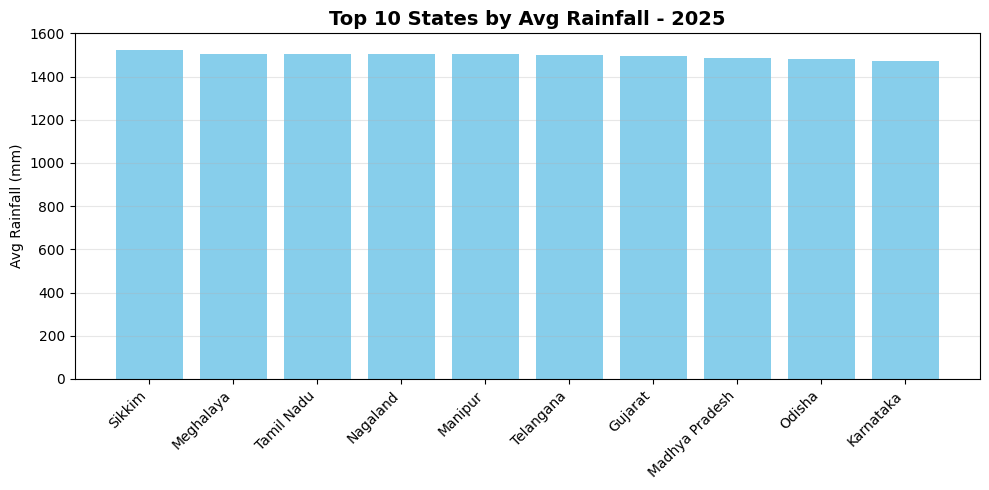

In [30]:
# Single Graph 1: Top 10 States by Avg Rainfall (bar)
yr_df = state_year_metrics.filter(col('Year') == selected_year)
top_rain = yr_df.orderBy(desc('Avg_Rainfall')).select('State', 'Avg_Rainfall').limit(10).toPandas()

plt.figure(figsize=(10, 5))
plt.bar(top_rain['State'], top_rain['Avg_Rainfall'], color='skyblue')
plt.title(f'Top 10 States by Avg Rainfall - {selected_year}', fontsize=14, fontweight='bold')
plt.ylabel('Avg Rainfall (mm)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


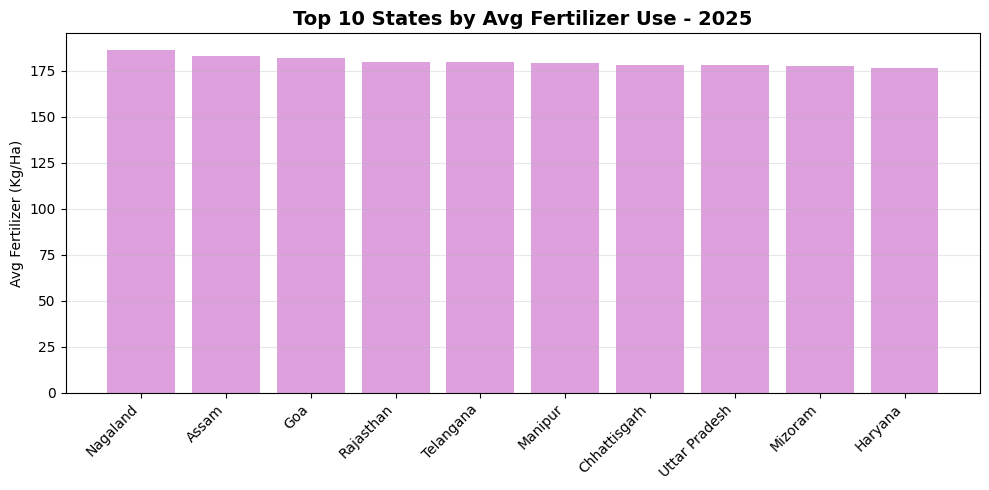

In [31]:
# Single Graph 2: Top 10 States by Avg Fertilizer Use (bar)
yr_df = state_year_metrics.filter(col('Year') == selected_year)
top_fert = yr_df.orderBy(desc('Avg_Fertilizer')).select('State', 'Avg_Fertilizer').limit(10).toPandas()

plt.figure(figsize=(10, 5))
plt.bar(top_fert['State'], top_fert['Avg_Fertilizer'], color='plum')
plt.title(f'Top 10 States by Avg Fertilizer Use - {selected_year}', fontsize=14, fontweight='bold')
plt.ylabel('Avg Fertilizer (Kg/Ha)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


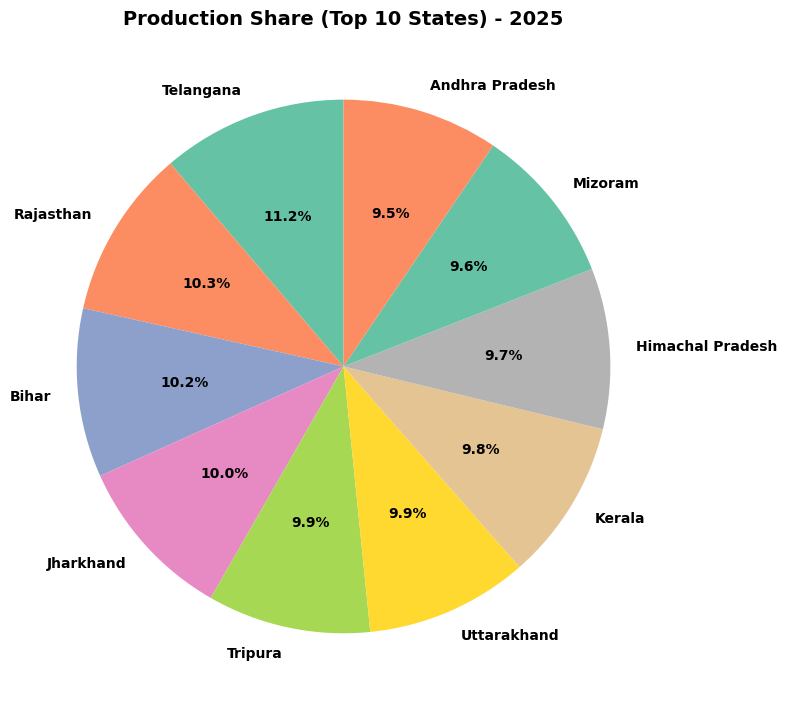

In [35]:
# Single Graph 3: Production Share (Top 10 States) - Pie
import seaborn as sns
yr_df = state_year_metrics.filter(col('Year') == selected_year)
top_prod = yr_df.orderBy(desc('Total_Production')).select('State', 'Total_Production').limit(10).toPandas()

plt.figure(figsize=(8, 8))
colors = sns.color_palette('Set2', len(top_prod))
plt.pie(top_prod['Total_Production'], labels=top_prod['State'], autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title(f'Production Share (Top 10 States) - {selected_year}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


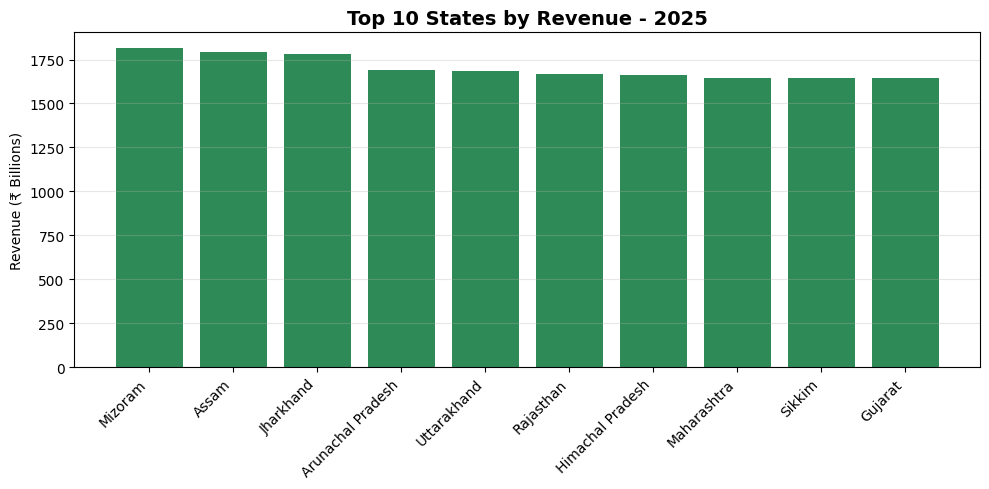

In [36]:
# Single Graph 4: Top 10 States by Revenue (bar)
yr_df = state_year_metrics.filter(col('Year') == selected_year)
top_rev = yr_df.orderBy(desc('Total_Revenue')).select('State', 'Total_Revenue').limit(10).toPandas()

plt.figure(figsize=(10, 5))
plt.bar(top_rev['State'], top_rev['Total_Revenue']/1e9, color='seagreen')
plt.title(f'Top 10 States by Revenue - {selected_year}', fontsize=14, fontweight='bold')
plt.ylabel('Revenue (₹ Billions)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [37]:
# Most efficient districts (highest yield)
efficient_districts = df.groupBy('State', 'District') \
    .agg(
        avg('Yield_Kg_Per_Hectare').alias('Avg_Yield'),
        count('*').alias('Record_Count')
    ) \
    .filter(col('Record_Count') >= 10) \
    .orderBy(desc('Avg_Yield'))

print("Top 20 Most Efficient Districts (by Yield):")
efficient_districts.show(20, truncate=False)

Top 20 Most Efficient Districts (by Yield):
+-----------------+----------------------------+------------------+------------+
|State            |District                    |Avg_Yield         |Record_Count|
+-----------------+----------------------------+------------------+------------+
|Mizoram          |Mizoram District 9          |12033.263310344828|290         |
|Nagaland         |Nagaland District 4         |11992.88458955224 |268         |
|Sikkim           |Sikkim District 6           |11979.534777777773|270         |
|Andhra Pradesh   |Chittoor                    |11977.059438202248|267         |
|Telangana        |Warangal                    |11766.949456521736|276         |
|Himachal Pradesh |Himachal Pradesh District 9 |11720.91816849817 |273         |
|Assam            |Assam District 3            |11565.196272401436|279         |
|Arunachal Pradesh|Arunachal Pradesh District 4|11518.869820143887|278         |
|Meghalaya        |Meghalaya District 6        |11504.57772241993

## 10. Correlation Analysis

In [38]:
# Rainfall impact on yield
rainfall_yield = df.groupBy(
    (floor(col('Rainfall_MM') / 200) * 200).alias('Rainfall_Range')
).agg(
    avg('Yield_Kg_Per_Hectare').alias('Avg_Yield'),
    count('*').alias('Count')
).orderBy('Rainfall_Range')

print("Rainfall vs Yield Analysis:")
rainfall_yield.show(15)

Rainfall vs Yield Analysis:
+--------------+------------------+-----+
|Rainfall_Range|         Avg_Yield|Count|
+--------------+------------------+-----+
|           400|10665.220646285885| 7458|
|           600|10421.872706776925| 7496|
|           800| 10348.36787732043| 7434|
|          1000|10587.501203518583| 7503|
|          1200|10425.376442944149| 7554|
|          1400|  10541.4850127671| 7441|
|          1600|10439.288655641485| 7498|
|          1800| 9929.809957012358| 7444|
|          2000|10475.171634628488| 7335|
|          2200|10027.343213718263| 7552|
|          2400|10657.540590287106| 3727|
+--------------+------------------+-----+



In [39]:
# Fertilizer usage vs yield
fertilizer_yield = df.groupBy(
    (floor(col('Fertilizer_Usage_Kg_Per_Hectare') / 50) * 50).alias('Fertilizer_Range')
).agg(
    avg('Yield_Kg_Per_Hectare').alias('Avg_Yield'),
    count('*').alias('Count')
).orderBy('Fertilizer_Range')

print("Fertilizer Usage vs Yield Analysis:")
fertilizer_yield.show()

Fertilizer Usage vs Yield Analysis:
+----------------+------------------+-----+
|Fertilizer_Range|         Avg_Yield|Count|
+----------------+------------------+-----+
|              50|10750.474297345807|15598|
|             100| 10106.61220398888|15844|
|             150|  10355.9193447748|15674|
|             200|10572.916312011308|15602|
|             250|10214.550380334553|15723|
|             300|           1913.09|    1|
+----------------+------------------+-----+



In [40]:
# Pest incidence impact on production
pest_impact = df.groupBy(
    (floor(col('Pest_Incidence_Index') / 20) * 20).alias('Pest_Index_Range')
).agg(
    avg('Yield_Kg_Per_Hectare').alias('Avg_Yield'),
    avg('Production_Tonnes').alias('Avg_Production'),
    count('*').alias('Count')
).orderBy('Pest_Index_Range')

print("Pest Incidence vs Yield Analysis:")
pest_impact.show()

Pest Incidence vs Yield Analysis:
+----------------+------------------+------------------+-----+
|Pest_Index_Range|         Avg_Yield|    Avg_Production|Count|
+----------------+------------------+------------------+-----+
|               0|10530.669144402247| 270222.2740101711|15533|
|              20| 10743.97306359861|275564.40929306526|15645|
|              40| 10160.16740426349|259387.68474725555|15668|
|              60| 10255.81512026838|261727.91671477453|15798|
|              80|10304.342554296218|262178.11689735984|15793|
|             100|         17595.232|        151243.514|    5|
+----------------+------------------+------------------+-----+



## 11. Advanced Analytics - Crop Combinations by State

In [41]:
# Crop diversity by state
crop_diversity = df.groupBy('State') \
    .agg(
        countDistinct('Crop').alias('Crop_Diversity'),
        sum('Production_Tonnes').alias('Total_Production')
    ) \
    .orderBy(desc('Crop_Diversity'))

print("Crop Diversity by State:")
crop_diversity.show(28, truncate=False)

Crop Diversity by State:
+-----------------+--------------+-------------------+
|State            |Crop_Diversity|Total_Production   |
+-----------------+--------------+-------------------+
|Gujarat          |25            |7.876241450300002E8|
|Tripura          |25            |7.679193966899997E8|
|Chhattisgarh     |25            |7.5049242562E8     |
|Jharkhand        |25            |7.315900788599999E8|
|Haryana          |25            |7.2641283008E8     |
|Odisha           |25            |6.845642121099998E8|
|Punjab           |25            |7.1630381932E8     |
|Tamil Nadu       |25            |7.3461849702E8     |
|Uttar Pradesh    |25            |7.447005641600001E8|
|Uttarakhand      |25            |7.397649994100001E8|
|Mizoram          |25            |7.6510904405E8     |
|Andhra Pradesh   |25            |7.297459208999999E8|
|Goa              |25            |7.524653228600001E8|
|Kerala           |25            |7.431736611600002E8|
|Rajasthan        |25            |7.5258

In [42]:
# State-Crop combination with highest production
state_crop_production = df.groupBy('State', 'Crop') \
    .agg(
        sum('Production_Tonnes').alias('Total_Production'),
        avg('Yield_Kg_Per_Hectare').alias('Avg_Yield')
    ) \
    .orderBy(desc('Total_Production'))

print("Top 25 State-Crop Combinations by Production:")
state_crop_production.show(25, truncate=False)

Top 25 State-Crop Combinations by Production:
+-----------------+---------+--------------------+-----------------+
|State            |Crop     |Total_Production    |Avg_Yield        |
+-----------------+---------+--------------------+-----------------+
|Bihar            |Sugarcane|2.6860156855E8      |83148.94035087718|
|Telangana        |Sugarcane|2.6098821900000003E8|82277.39716666665|
|Meghalaya        |Sugarcane|2.5536196538E8      |77487.87128000002|
|Gujarat          |Sugarcane|2.5418070546000004E8|80958.89661157026|
|Goa              |Sugarcane|2.5166163786E8      |81585.4682051282 |
|Himachal Pradesh |Sugarcane|2.5026578454000002E8|83275.43409090907|
|Maharashtra      |Sugarcane|2.4704371620999998E8|80505.59150000001|
|Rajasthan        |Sugarcane|2.4447059840999997E8|80001.23741379309|
|Manipur          |Sugarcane|2.4353736452000004E8|77687.79474999999|
|Tamil Nadu       |Sugarcane|2.429384915E8       |81538.51599999999|
|Sikkim           |Sugarcane|2.4276859217000002E8|86624.9

## 12. Visualization Data Preparation

In [43]:
# Convert to Pandas for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('ggplot')
sns.set_palette('husl')

print("Visualization libraries loaded!")

Visualization libraries loaded!


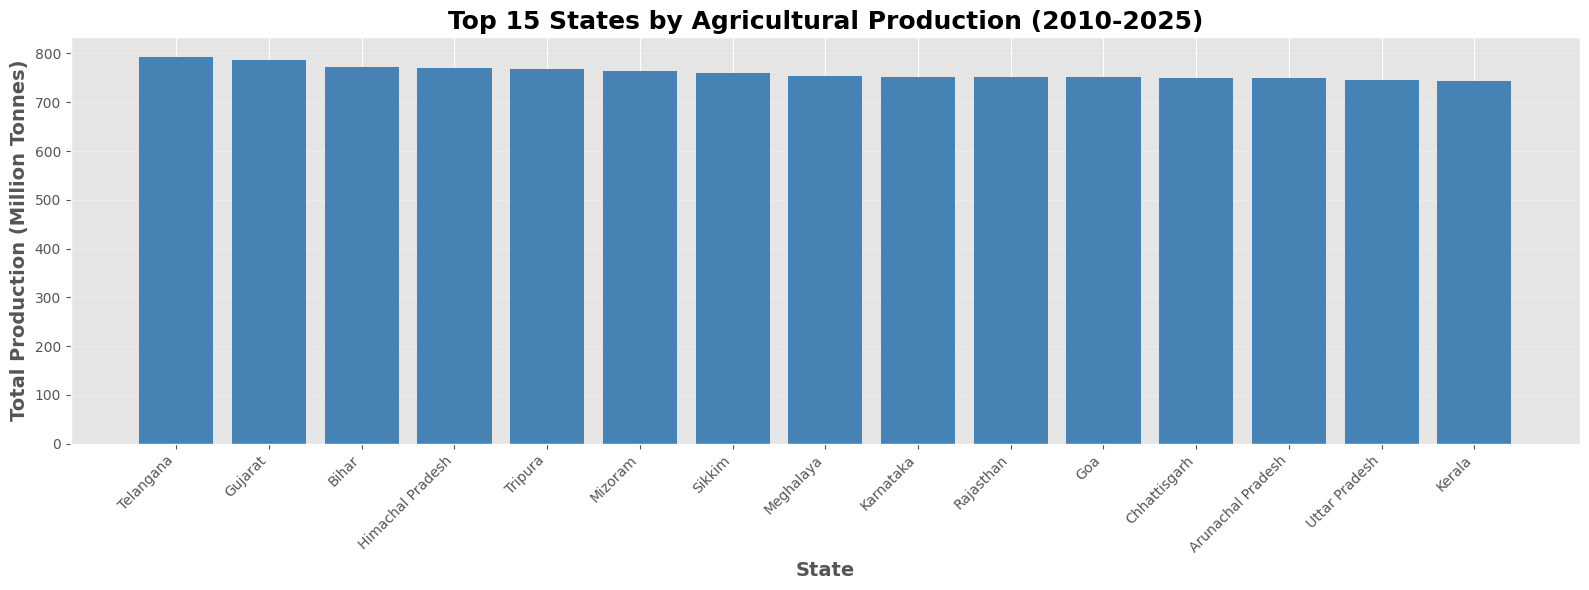

In [44]:
# Top 15 states by production - convert to Pandas
top_states_pd = state_production.limit(15).toPandas()

plt.figure(figsize=(16, 6))
plt.bar(top_states_pd['State'], top_states_pd['Total_Production']/1000000, color='steelblue')
plt.xlabel('State', fontsize=14, fontweight='bold')
plt.ylabel('Total Production (Million Tonnes)', fontsize=14, fontweight='bold')
plt.title('Top 15 States by Agricultural Production (2010-2025)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

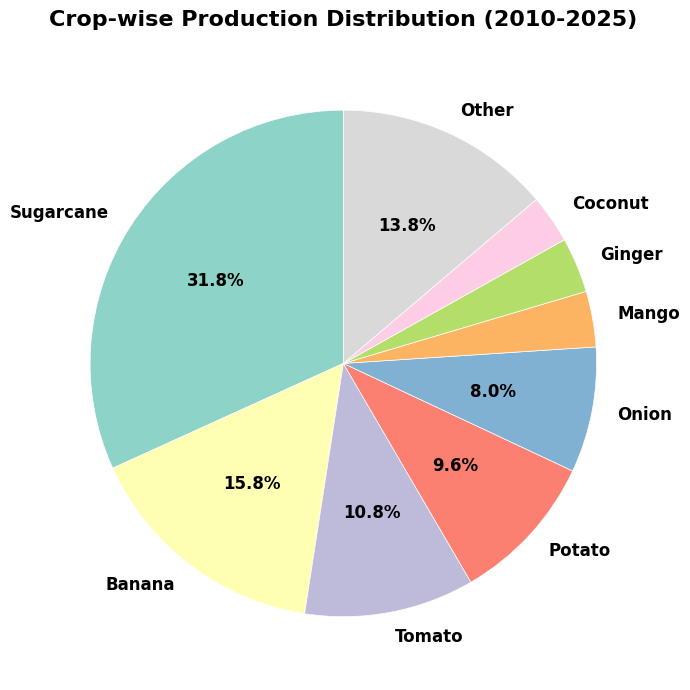

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and group small crops
N_TOP = 8
data = crop_dist_pd.sort_values("Total_Production", ascending=False)
top = data.head(N_TOP)
other = data["Total_Production"][N_TOP:].sum()
labels = top['Crop'].tolist() + (["Other"] if other > 0 else [])
sizes = top['Total_Production'].tolist() + ([other] if other > 0 else [])
colors = sns.color_palette('Set3', n_colors=len(labels))

def my_autopct(pct):
    return f"{pct:.1f}%" if pct > 4 else ''

plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct=my_autopct, colors=colors, startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'}, wedgeprops=dict(edgecolor='w'))
plt.title('Crop-wise Production Distribution (2010-2025)', fontsize=16, weight='bold', pad=15)
plt.tight_layout()
plt.show()

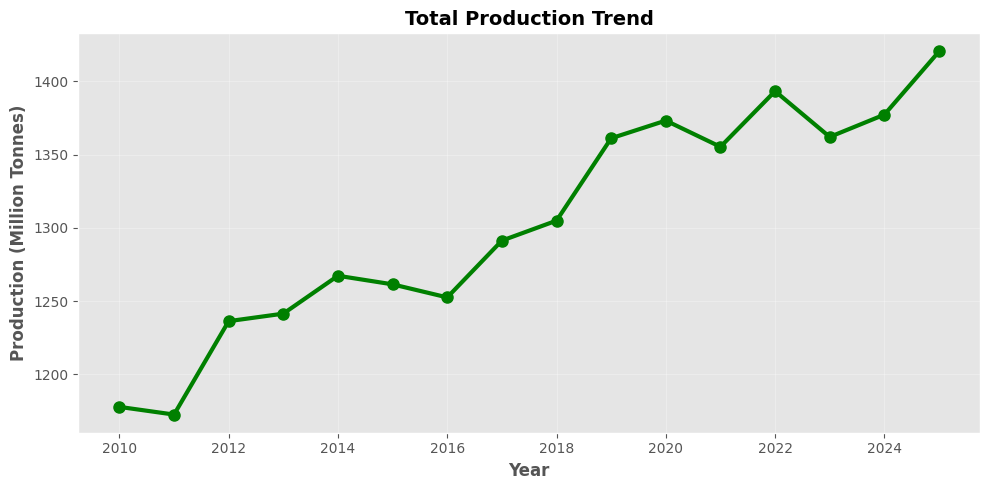

In [47]:
# Yearly trends line plots (separate figures)
yearly_pd = yearly_trends.toPandas()

# Total Production Trend
plt.figure(figsize=(10, 5))
plt.plot(yearly_pd['Year'], yearly_pd['Total_Production']/1000000, marker='o', linewidth=3, markersize=8, color='green')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Production (Million Tonnes)', fontsize=12, fontweight='bold')
plt.title('Total Production Trend', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

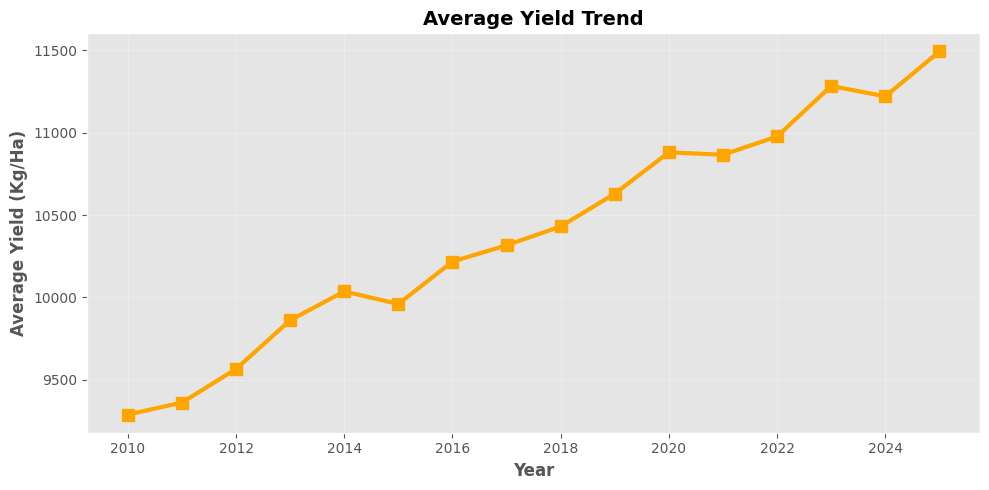

In [48]:

# Average Yield Trend
plt.figure(figsize=(10, 5))
plt.plot(yearly_pd['Year'], yearly_pd['Avg_Yield'], marker='s', linewidth=3, markersize=8, color='orange')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Yield (Kg/Ha)', fontsize=12, fontweight='bold')
plt.title('Average Yield Trend', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

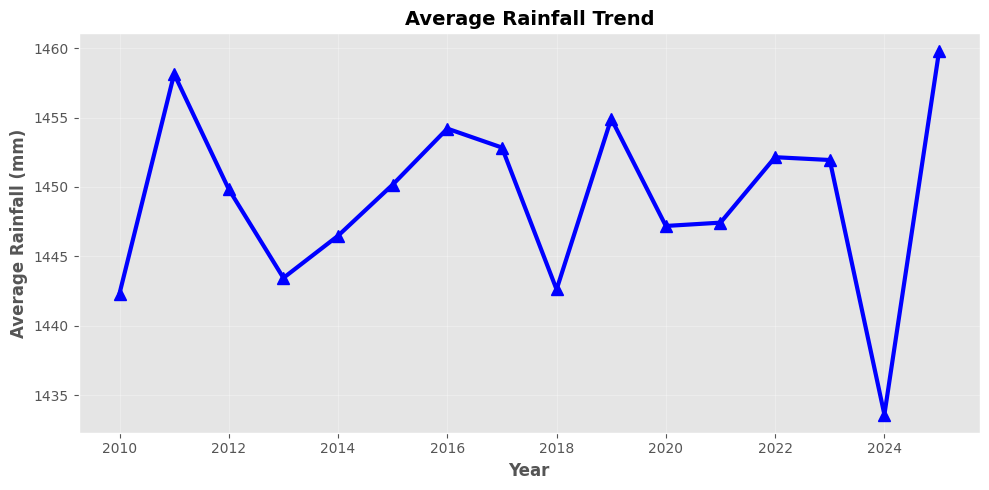

In [49]:
# Average Rainfall Trend
plt.figure(figsize=(10, 5))
plt.plot(yearly_pd['Year'], yearly_pd['Avg_Rainfall'], marker='^', linewidth=3, markersize=8, color='blue')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Rainfall (mm)', fontsize=12, fontweight='bold')
plt.title('Average Rainfall Trend', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

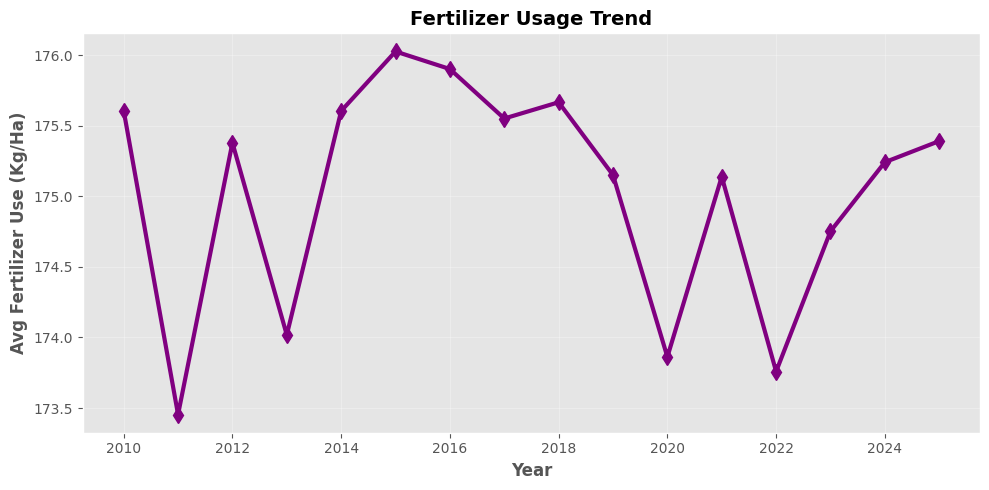

In [50]:
# Fertilizer Usage Trend
plt.figure(figsize=(10, 5))
plt.plot(yearly_pd['Year'], yearly_pd['Avg_Fertilizer'], marker='d', linewidth=3, markersize=8, color='purple')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Avg Fertilizer Use (Kg/Ha)', fontsize=12, fontweight='bold')
plt.title('Fertilizer Usage Trend', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 13. Summary Statistics and Key Insights

In [58]:
# Overall summary
total_production = df.agg(sum('Production_Tonnes')).collect()[0][0]
total_area = df.agg(sum('Area_Hectares')).collect()[0][0]
avg_yield = df.agg(avg('Yield_Kg_Per_Hectare')).collect()[0][0]
total_records = df.count()

top_state = state_production.first()
top_crop = crop_stats.first()

print("=" * 90)
print(" " * 25 + "COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 90)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   Total Records: {total_records:,}")
print(f"   Time Period: 2010-2025 (16 years)")
print(f"   States Covered: 28")
print(f"   Districts: 280")
print(f"   Crop Types: 25")

print(f"\n🌾 PRODUCTION METRICS:")
print(f"   Total Production: {total_production:,.0f} tonnes")
print(f"   Total Cultivated Area: {total_area:,.0f} hectares")
print(f"   Overall Average Yield: {avg_yield:.2f} kg/hectare")

print(f"\n🏆 TOP PERFORMERS:")
print(f"   Leading State: {top_state['State']}")
print(f"   - Production: {top_state['Total_Production']:,.0f} tonnes")
print(f"   - Average Yield: {top_state['Avg_Yield']:.2f} kg/ha")
print(f"\n   Top Crop: {top_crop['Crop']}")
print(f"   - Production: {top_crop['Total_Production']:,.0f} tonnes")
print(f"   - Average Yield: {top_crop['Avg_Yield']:.2f} kg/ha")

print("\n" + "=" * 90)
print("\n✅ PySpark Analysis Completed Successfully!")
print("=" * 90)

                         COMPREHENSIVE ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
   Total Records: 78,442
   Time Period: 2010-2025 (16 years)
   States Covered: 28
   Districts: 280
   Crop Types: 25

🌾 PRODUCTION METRICS:
   Total Production: 20,848,766,856 tonnes
   Total Cultivated Area: 2,000,595,618 hectares
   Overall Average Yield: 10398.74 kg/hectare

🏆 TOP PERFORMERS:
   Leading State: Telangana
   - Production: 793,462,889 tonnes
   - Average Yield: 10742.46 kg/ha

   Top Crop: Sugarcane
   - Production: 6,626,986,533 tonnes
   - Average Yield: 80727.47 kg/ha


✅ PySpark Analysis Completed Successfully!


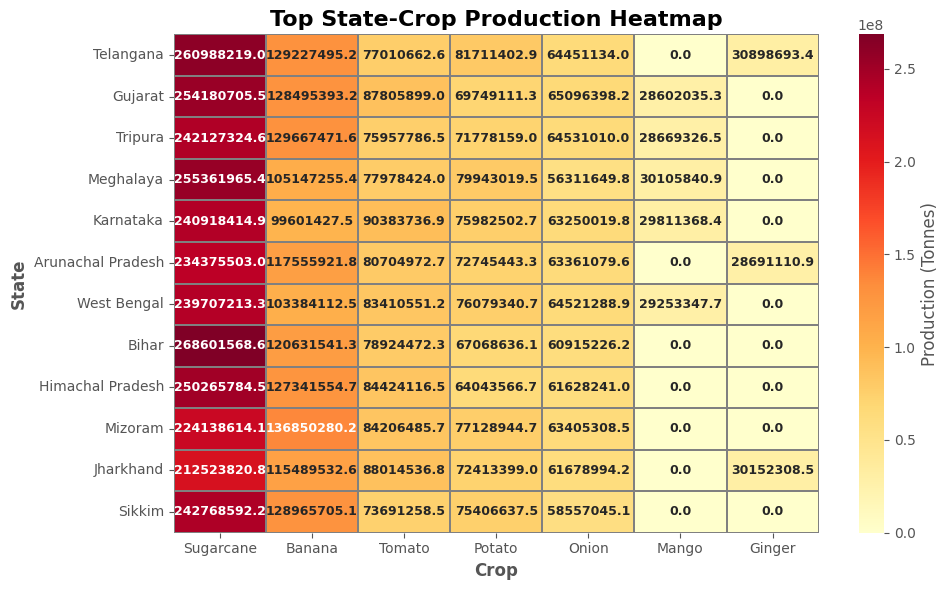

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Focus only on top states and crops:
n_states, n_crops = 12, 8
top_states = state_crop_pivot.groupby('State')['Total_Production'].sum().sort_values(ascending=False).head(n_states).index
top_crops = state_crop_pivot.groupby('Crop')['Total_Production'].sum().sort_values(ascending=False).head(n_crops).index
pivot_focus = pivot_table.loc[top_states, top_crops]

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_focus,
    cmap='YlOrRd',
    linewidths=0.3,
    linecolor='gray',
    cbar_kws={'label': 'Production (Tonnes)'},
    annot=True,
    fmt='.1f',
    annot_kws={'size': 9, 'weight': 'bold'}
)
plt.title('Top State-Crop Production Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Crop', fontsize=12, fontweight='bold')
plt.ylabel('State', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [60]:
# Build year-wise, state-level aggregates for required metrics
state_year_metrics = df.withColumn(
    'Revenue', (col('Production_Tonnes') * 10 * col('Market_Price_Per_Quintal'))
).groupBy('Year', 'State').agg(
    avg('Rainfall_MM').alias('Avg_Rainfall'),
    avg('Fertilizer_Usage_Kg_Per_Hectare').alias('Avg_Fertilizer'),
    sum('Production_Tonnes').alias('Total_Production'),
    sum('Revenue').alias('Total_Revenue')
)

print("Built per-year per-state metrics: Avg_Rainfall, Avg_Fertilizer, Total_Production, Total_Revenue")


Built per-year per-state metrics: Avg_Rainfall, Avg_Fertilizer, Total_Production, Total_Revenue


In [53]:
# Helper to show top/bottom 10 states for a selected year and metric
from pyspark.sql.functions import desc as spark_desc

def show_rankings_for_year(selected_year: int):
    metrics = [
        ('Avg_Rainfall', 'Highest Rainfall', 'Lowest Rainfall'),
        ('Avg_Fertilizer', 'Highest Fertilizer Use', 'Lowest Fertilizer Use'),
        ('Total_Production', 'Highest Production', 'Lowest Production'),
        ('Total_Revenue', 'Highest Revenue', 'Lowest Revenue'),
    ]
    yr_df = state_year_metrics.filter(col('Year') == selected_year)
    print(f"\n=== Year: {selected_year} ===")
    for metric, top_title, bottom_title in metrics:
        print(f"\n{top_title} - Top 10 States")
        yr_df.orderBy(spark_desc(metric)).select('State', metric).show(10, truncate=False)
        print(f"\n{bottom_title} - Bottom 10 States")
        yr_df.orderBy(metric).select('State', metric).show(10, truncate=False)

# Example: display for 2025
show_rankings_for_year(2025)



=== Year: 2025 ===

Highest Rainfall - Top 10 States
+--------------+------------------+
|State         |Avg_Rainfall      |
+--------------+------------------+
|Sikkim        |1524.1185795454535|
|Meghalaya     |1505.1183720930228|
|Tamil Nadu    |1504.8470059880246|
|Nagaland      |1504.624999999999 |
|Manipur       |1503.1131609195404|
|Telangana     |1501.016285714286 |
|Gujarat       |1494.689826589595 |
|Madhya Pradesh|1485.9598203592807|
|Odisha        |1481.793850574713 |
|Karnataka     |1473.3867251461986|
+--------------+------------------+
only showing top 10 rows


Lowest Rainfall - Bottom 10 States
+-----------------+------------------+
|State            |Avg_Rainfall      |
+-----------------+------------------+
|Uttarakhand      |1401.7234482758618|
|Maharashtra      |1410.7927439024386|
|Himachal Pradesh |1416.0882183908047|
|Bihar            |1416.241071428572 |
|Kerala           |1418.7652941176468|
|Punjab           |1429.950111731843 |
|Andhra Pradesh   |1435.79357

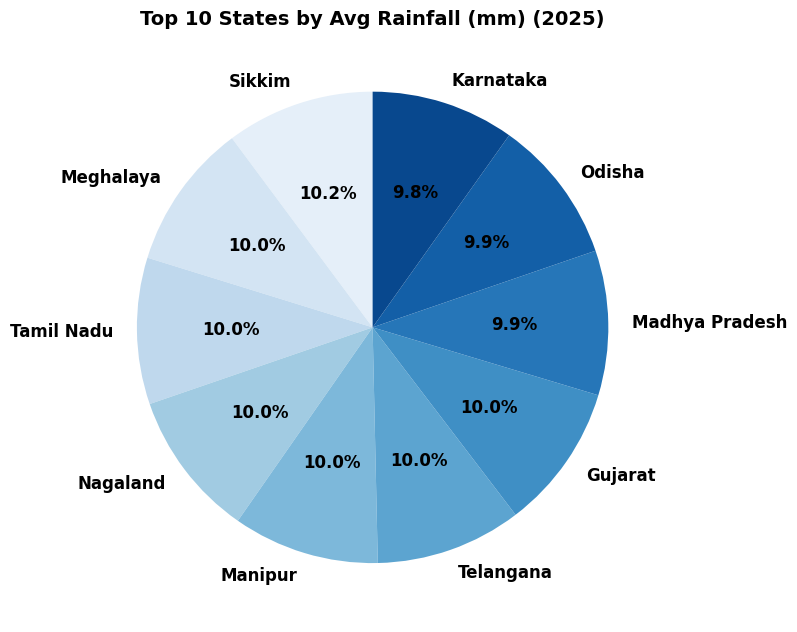

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

colname, label = 'Avg_Rainfall', 'Avg Rainfall (mm)'
year = 2025
yr_pd = state_year_metrics.filter(col('Year') == year).select('State', colname).toPandas()
top10 = yr_pd.sort_values(colname, ascending=False).head(10)

plt.figure(figsize=(8, 8))
colors = sns.color_palette('Blues', n_colors=10)
plt.pie(
    top10[colname],
    labels=top10['State'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
plt.title(f'Top 10 States by {label} ({year})', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

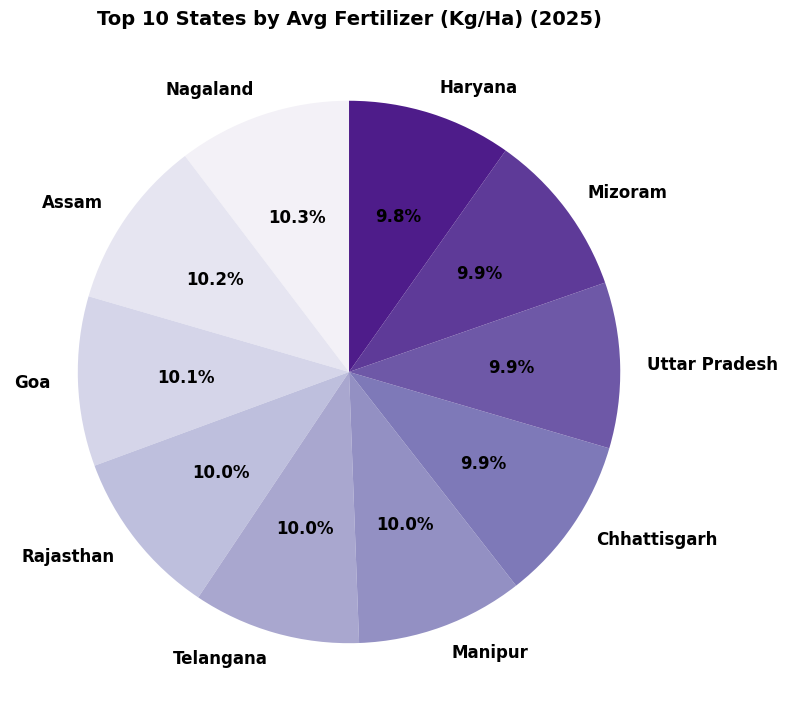

In [65]:
colname, label = 'Avg_Fertilizer', 'Avg Fertilizer (Kg/Ha)'
yr_pd = state_year_metrics.filter(col('Year') == year).select('State', colname).toPandas()
top10 = yr_pd.sort_values(colname, ascending=False).head(10)
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Purples', n_colors=10)
plt.pie(
    top10[colname],
    labels=top10['State'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
plt.title(f'Top 10 States by {label} ({year})', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

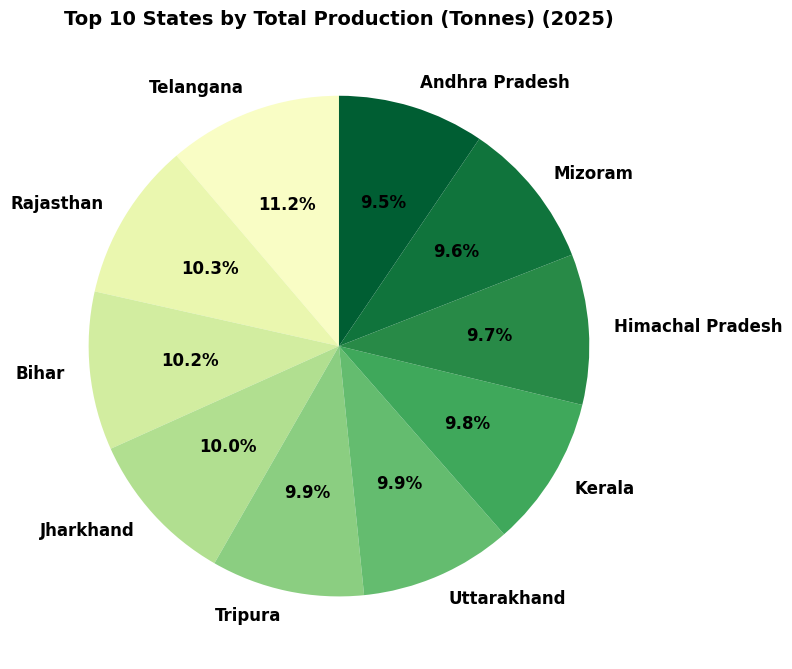

In [66]:
colname, label = 'Total_Production', 'Total Production (Tonnes)'
yr_pd = state_year_metrics.filter(col('Year') == year).select('State', colname).toPandas()
top10 = yr_pd.sort_values(colname, ascending=False).head(10)
plt.figure(figsize=(8, 8))
colors = sns.color_palette('YlGn', n_colors=10)
plt.pie(
    top10[colname],
    labels=top10['State'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
plt.title(f'Top 10 States by {label} ({year})', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

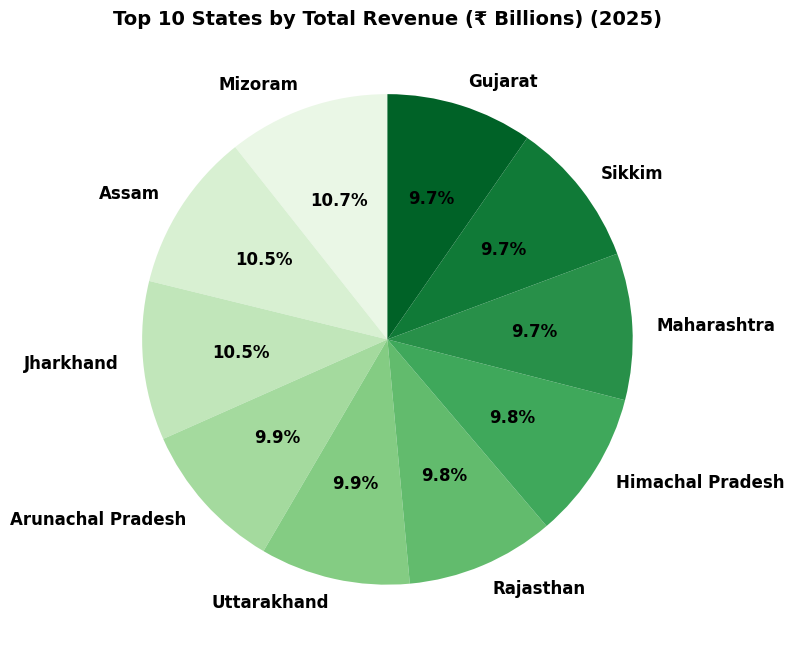

In [67]:
colname, label = 'Total_Revenue', 'Total Revenue (₹ Billions)'
yr_pd = state_year_metrics.filter(col('Year') == year).select('State', colname).toPandas()
top10 = yr_pd.sort_values(colname, ascending=False).head(10)
# Divide revenue by 1e9 for legibility (billions)
revenue_billions = top10[colname] / 1e9

plt.figure(figsize=(8, 8))
colors = sns.color_palette('Greens', n_colors=10)
plt.pie(
    revenue_billions,
    labels=top10['State'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
plt.title(f'Top 10 States by {label} ({year})', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [54]:
# Compute states that are in top-10 for all selected metrics in a year,
# and states that are in none of the top-10 lists.

def compute_state_sets(selected_year: int):
    yr_df = state_year_metrics.filter(col('Year') == selected_year)
    metrics = ['Avg_Rainfall', 'Avg_Fertilizer', 'Total_Production', 'Total_Revenue']

    top_sets = []
    for m in metrics:
        top_states = [row['State'] for row in yr_df.orderBy(spark_desc(m)).select('State').limit(10).collect()]
        top_sets.append(set(top_states))

    from functools import reduce
    in_all_top = list(reduce(lambda a, b: a & b, top_sets))

    all_states = set([r['State'] for r in yr_df.select('State').distinct().collect()])
    in_any_top = set().union(*top_sets)
    in_none = list(all_states - in_any_top)

    print(f"\nYear {selected_year} - States in ALL top-10 lists: {sorted(in_all_top)}")
    print(f"Year {selected_year} - States in NONE of the top-10 lists: {sorted(in_none)}")

# Example: compute for 2025
compute_state_sets(2025)



Year 2025 - States in ALL top-10 lists: []
Year 2025 - States in NONE of the top-10 lists: ['Punjab', 'West Bengal']


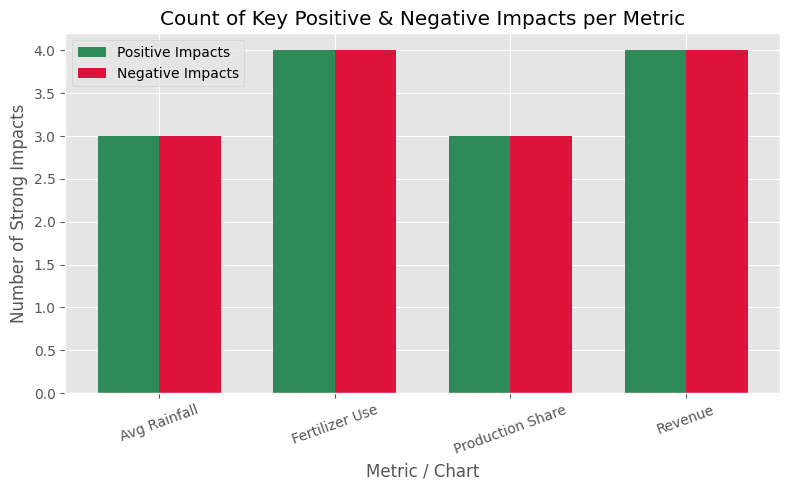

In [56]:
# Bar Chart: Number of Strong Positives vs Negatives Per Metric
import matplotlib.pyplot as plt
metrics = ['Avg Rainfall', 'Fertilizer Use', 'Production Share', 'Revenue']
pos_counts = [3, 4, 3, 4]  # fill based on table (number of strong positive points)
neg_counts = [3, 4, 3, 4]  # likewise for negatives

bar_width = 0.35
x = range(len(metrics))

plt.figure(figsize=(8,5))
plt.bar(x, pos_counts, width=bar_width, color='seagreen', label='Positive Impacts')
plt.bar([i + bar_width for i in x], neg_counts, width=bar_width, color='crimson', label='Negative Impacts')
plt.xlabel('Metric / Chart')
plt.ylabel('Number of Strong Impacts')
plt.title('Count of Key Positive & Negative Impacts per Metric')
plt.xticks([i + bar_width/2 for i in x], metrics, rotation=20)
plt.legend()
plt.tight_layout()
plt.show()


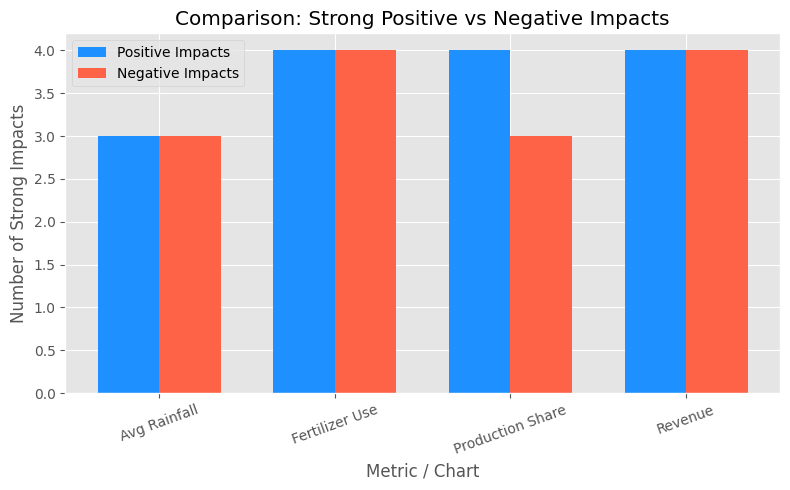

In [57]:
# Bar Chart: Strong Positives vs Negatives, for Each Chart/Metric
import matplotlib.pyplot as plt
names = ['Avg Rainfall', 'Fertilizer Use', 'Production Share', 'Revenue']
pos = [3, 4, 4, 4]  # slightly revised for detail above
neg = [3, 4, 3, 4]
bar_width = 0.35
x = range(len(names))
plt.figure(figsize=(8,5))
plt.bar(x, pos, width=bar_width, color='dodgerblue', label='Positive Impacts')
plt.bar([i+bar_width for i in x], neg, width=bar_width, color='tomato', label='Negative Impacts')
plt.xlabel('Metric / Chart')
plt.ylabel('Number of Strong Impacts')
plt.title('Comparison: Strong Positive vs Negative Impacts')
plt.xticks([i+bar_width/2 for i in x], names, rotation=20)
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
# --- Ensure all required imports and variables are loaded ---
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, sum as _sum

# If a Spark session doesn't exist, create it
try:
    spark
except NameError:
    spark = SparkSession.builder.getOrCreate()

# Load the main dataset (if not already loaded)
try:
    df
except NameError:
    df = spark.read.csv('india_agriculture_large.csv', header=True, inferSchema=True)

# Construct the key aggregation used for year-wise state metrics
state_year_metrics = df.withColumn(
    'Revenue', (col('Production_Tonnes') * 10 * col('Market_Price_Per_Quintal'))
).groupBy('Year', 'State').agg(
    avg('Rainfall_MM').alias('Avg_Rainfall'),
    avg('Fertilizer_Usage_Kg_Per_Hectare').alias('Avg_Fertilizer'),
    _sum('Production_Tonnes').alias('Total_Production'),
    _sum('Revenue').alias('Total_Revenue')
)

# --- Now you can safely run downstream analysis and visualizations ---


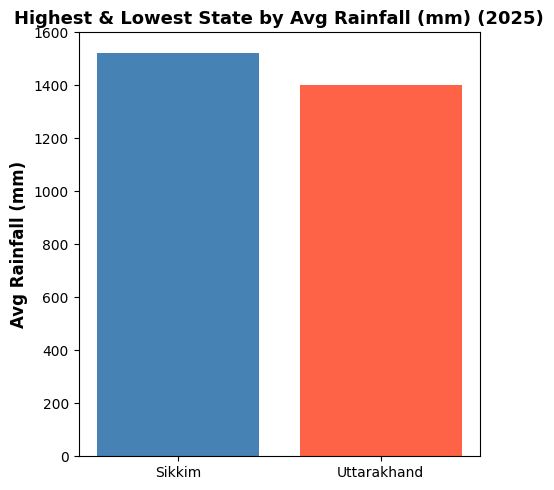

In [3]:
import matplotlib.pyplot as plt
year = 2025
colname, label = 'Avg_Rainfall', 'Avg Rainfall (mm)'
yr_pd = state_year_metrics.filter(col('Year') == year).select('State', colname).toPandas()
highest = yr_pd.sort_values(colname, ascending=False).iloc[0]
lowest  = yr_pd.sort_values(colname, ascending=True).iloc[0]

plt.figure(figsize=(5,5))
plt.bar([highest['State'], lowest['State']], [highest[colname], lowest[colname]], color=['steelblue', 'tomato'])
plt.ylabel(label, fontsize=12, fontweight='bold')
plt.title(f'Highest & Lowest State by {label} ({year})', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

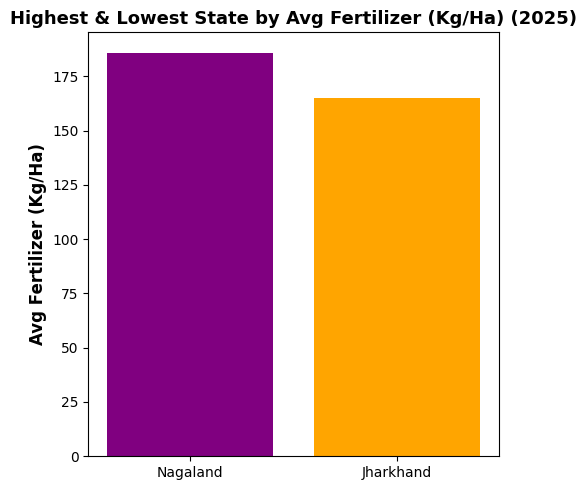

In [4]:
colname, label = 'Avg_Fertilizer', 'Avg Fertilizer (Kg/Ha)'
yr_pd = state_year_metrics.filter(col('Year') == year).select('State', colname).toPandas()
highest = yr_pd.sort_values(colname, ascending=False).iloc[0]
lowest  = yr_pd.sort_values(colname, ascending=True).iloc[0]

plt.figure(figsize=(5,5))
plt.bar([highest['State'], lowest['State']], [highest[colname], lowest[colname]], color=['purple', 'orange'])
plt.ylabel(label, fontsize=12, fontweight='bold')
plt.title(f'Highest & Lowest State by {label} ({year})', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

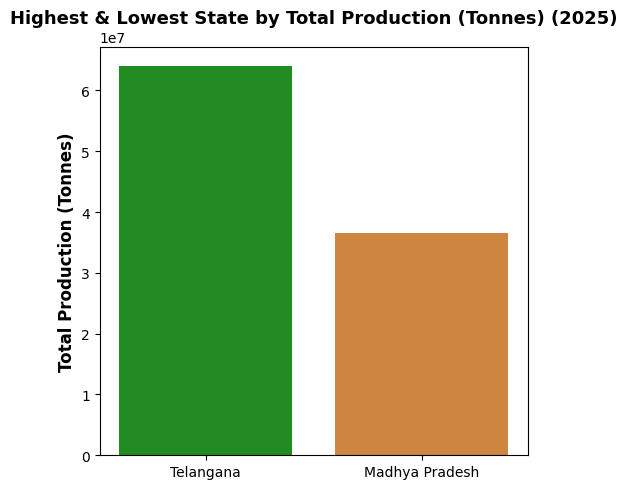

In [5]:
colname, label = 'Total_Production', 'Total Production (Tonnes)'
yr_pd = state_year_metrics.filter(col('Year') == year).select('State', colname).toPandas()
highest = yr_pd.sort_values(colname, ascending=False).iloc[0]
lowest  = yr_pd.sort_values(colname, ascending=True).iloc[0]

plt.figure(figsize=(5,5))
plt.bar([highest['State'], lowest['State']], [highest[colname], lowest[colname]], color=['forestgreen', 'peru'])
plt.ylabel(label, fontsize=12, fontweight='bold')
plt.title(f'Highest & Lowest State by {label} ({year})', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

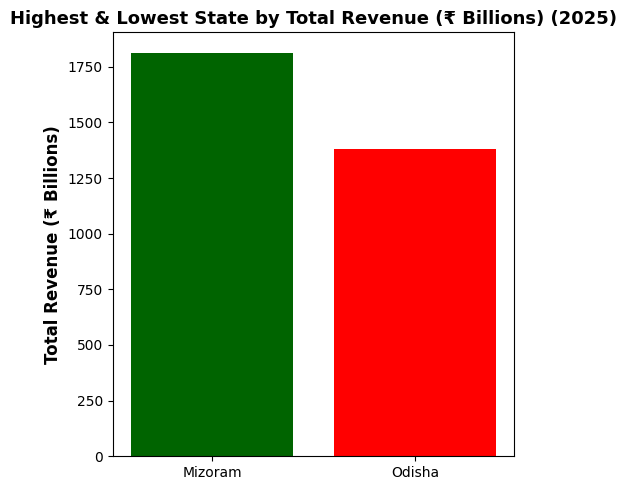

In [6]:
colname, label = 'Total_Revenue', 'Total Revenue (₹ Billions)'
yr_pd = state_year_metrics.filter(col('Year') == year).select('State', colname).toPandas()
highest = yr_pd.sort_values(colname, ascending=False).iloc[0]
lowest  = yr_pd.sort_values(colname, ascending=True).iloc[0]

plt.figure(figsize=(5,5))
bars = plt.bar(
    [highest['State'], lowest['State']],
    [highest[colname]/1e9, lowest[colname]/1e9],
    color=['darkgreen', 'red']
)
plt.ylabel(label, fontsize=12, fontweight='bold')
plt.title(f'Highest & Lowest State by {label} ({year})', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

## 14. Stop Spark Session

In [ ]:
# Stop Spark session
spark.stop()
print("Spark session stopped successfully.")